In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow as  tf
import numpy as np
import cv2
import os
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset=train.flow_from_directory('/content/drive/MyDrive/data_faceid_train',
                                      target_size = (150,150),
                                       batch_size = 12,  #sohatgao1muong
                                       class_mode = 'categorical') #phan loai

validation_dataset=validation.flow_from_directory('/content/drive/MyDrive/data_faceid_test',
                                      target_size = (150,150),
                                       batch_size = 12,  #sohatgao1muong
                                       class_mode = 'categorical') #phan loai       

Found 10 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'phuc': 0, 'vinh': 1}

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',padding='same',input_shape =(150,150,3)),
                                    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',padding='same'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',padding='same'),
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',padding='same'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding='same'),
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding='same'),
                                    tf.keras.layers.MaxPool2D(2,2),
                     
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(256,activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(2,activation='softmax')
                                    ])

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history_2 = model.fit(train_dataset,batch_size=128,epochs=20,verbose=1,validation_data=validation_dataset)

Epoch 1/20
1/1 [==============================] - 6s 6s/step - loss: 0.7130 - accuracy: 0.0000e+00 - val_loss: 0.7095 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 174ms/step - loss: 0.7080 - accuracy: 0.0000e+00 - val_loss: 0.7008 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 177ms/step - loss: 0.6991 - accuracy: 0.0000e+00 - val_loss: 0.6892 - val_accuracy: 0.7000
Epoch 4/20
1/1 [==============================] - 0s 172ms/step - loss: 0.6872 - accuracy: 1.0000 - val_loss: 0.6759 - val_accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 173ms/step - loss: 0.6737 - accuracy: 1.0000 - val_loss: 0.6615 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 174ms/step - loss: 0.6596 - accuracy: 1.0000 - val_loss: 0.6464 - val_accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 173ms/step - loss: 0.6448 - accuracy: 1.0000 - val_loss: 0.6314 - val_accuracy: 1.0000
Epo

In [ ]:
model.save('/content/drive/MyDrive/AI/faceid.h5')

In [ ]:
model=load_model('/content/drive/MyDrive/AI/faceid.h5')

In [ ]:
#danh gia val
score=model.evaluate(validation_dataset,verbose=1)
print("test loss = ",score[0])
print("test accuracy = ",score[1])

1/1 [==============================] - 0s 266ms/step - loss: 0.2566 - accuracy: 1.0000
test loss =  0.2566257417201996
test accuracy =  1.0


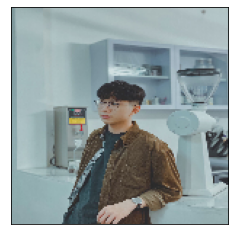

vinh


In [ ]:

img = load_img("/tôi.jpg", target_size=(150,150))
plt.xticks([])
plt.yticks([])
plt.imshow(img)
plt.show()
x= img_to_array(img)
x=np.expand_dims(x,axis=0)
images = np.vstack([x])
val=np.argmax(model.predict(images))
if val == 0:
    print("phuc")
if val == 1:
    print("vinh")
